### Using Sentiment Analysis to retrieve themes/topics and vibe from musical lyrics

Step 0. Read in Data and NLTK Basics

In [2]:
!pip install ipywidgets
!pip install gensim




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as bp
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
import nltk

nltk.download('maxent_ne_chunker_tab')  
nltk.download('words')                  # need for NER
nltk.download('punkt')                  # needed for tokenization part
nltk.download('averaged_perceptron_tagger')  # need for pos_tag
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\joshu\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\joshu\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\joshu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\joshu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
df = pd.read_csv(r"C:\Users\joshu\OneDrive\Desktop\CS74\Final_Project\Data\Music\merged_chart_audio_lyrics.csv")



C:\Users\joshu\AppData\Local\Temp\ipykernel_44424\155884209.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\joshu\OneDrive\Desktop\CS74\Final_Project\Data\Music\merged_chart_audio_lyrics.csv")


In [6]:

example = df['lyrics'][20000]
print(example)

[Intro]
Back it up, back it up
You got it, you got it
Put your hands up, put your hands up, put your hands up
Uh-uh-uh
You got it, you got it

[Chorus]
Drive back, baby, to me fast in your car
I'm here waiting, crash into me real hard
Drive back, baby, to me fast in your car
I'm here waiting, crash into me real hard

[Verse 1]
I wander 'round the room, and I'm getting things ready
I picture you driving just like Mario Andretti
I got the kush, Ketel One, waiting for your engine
Your Grand Prix attention, it's gonna be a party

[Pre-Chorus]
Don't forget to make a U-turn
I see you left your blinker on
I got it rolled and ready here to burn
Meet me back at home
At home, at home
[Chorus]
Drive back, baby, to me fast in your car
I'm here waiting, crash into me real hard
Drive back, baby, to me fast in your car
I'm here waiting, crash into me real hard

[B-Section]
Driving fast in your car
I've got you tracked on my radar
Ohh

[Verse 2]
It's just such a trip how you're still my speed racer
Yo

In [7]:
tokens = nltk.word_tokenize(example)
tokens[:10]
tagged = nltk.pos_tag(tokens)
named_entities = nltk.ne_chunk(tagged)
print(named_entities)


(S
  [/JJ
  Intro/NNP
  ]/NNP
  Back/NNP
  it/PRP
  up/RP
  ,/,
  back/RB
  it/PRP
  up/RP
  You/PRP
  got/VBD
  it/PRP
  ,/,
  you/PRP
  got/VBD
  it/PRP
  Put/VB
  your/PRP$
  hands/NNS
  up/RB
  ,/,
  put/VB
  your/PRP$
  hands/NNS
  up/RB
  ,/,
  put/VB
  your/PRP$
  hands/NNS
  up/RP
  Uh-uh-uh/NNP
  You/PRP
  got/VBD
  it/PRP
  ,/,
  you/PRP
  got/VBD
  it/PRP
  [/NNP
  Chorus/NNP
  ]/NNP
  Drive/NNP
  back/RB
  ,/,
  baby/NN
  ,/,
  to/TO
  me/PRP
  fast/VB
  in/IN
  your/PRP$
  car/NN
  I/PRP
  'm/VBP
  here/RB
  waiting/VBG
  ,/,
  crash/NN
  into/IN
  me/PRP
  real/JJ
  hard/JJ
  Drive/NNP
  back/NN
  ,/,
  baby/NN
  ,/,
  to/TO
  me/PRP
  fast/VB
  in/IN
  your/PRP$
  car/NN
  I/PRP
  'm/VBP
  here/RB
  waiting/VBG
  ,/,
  crash/NN
  into/IN
  me/PRP
  real/JJ
  hard/JJ
  [/NN
  Verse/NNP
  1/CD
  ]/NN
  I/PRP
  wander/VBP
  'round/IN
  the/DT
  room/NN
  ,/,
  and/CC
  I/PRP
  'm/VBP
  getting/VBG
  things/NNS
  ready/JJ
  I/PRP
  picture/VBP
  you/PRP
  driving/VBG
  just/

### Step 1. Vader Sentiment Scoring
Using NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

results = {}
#run the polairt score on the entire dataset
for idx, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['lyrics'])
    song_id = row['SongID']  # make sure column name matches exactly
    results[song_id] = sia.polarity_scores(text)




  0%|          | 0/330602 [00:00<?, ?it/s]

In [9]:
vaders = pd.DataFrame(results).T

# Convert results dictionary → DataFrame
sentiment_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'SongID'})

df = df.drop(columns=['neg', 'neu', 'pos', 'compound'], errors='ignore')

df = df.merge(sentiment_df, on='SongID', how='left')

#check
print(df[['SongID', 'neg', 'neu', 'pos', 'compound']].head())

print(df[['neg', 'neu', 'pos', 'compound']].describe())
print("Most positive songs:")
print(df.nlargest(5, 'compound')[['SongID', 'compound']])

print("\nMost negative songs:")
print(df.nsmallest(5, 'compound')[['SongID', 'compound']])
df.to_csv(r"C:\Users\joshu\OneDrive\Desktop\CS74\Final_Project\merged_with_sentiment_and_topics.csv", index=False)
print("Saved merged dataset with sentiment and topic cols")


                             SongID    neg    neu    pos  compound
0  Don't Just Stand TherePatty Duke  0.091  0.755  0.155     0.943
1  Don't Just Stand TherePatty Duke  0.091  0.755  0.155     0.943
2  Don't Just Stand TherePatty Duke  0.091  0.755  0.155     0.943
3  Don't Just Stand TherePatty Duke  0.091  0.755  0.155     0.943
4  Don't Just Stand TherePatty Duke  0.091  0.755  0.155     0.943
                 neg            neu            pos       compound
count  330602.000000  330602.000000  330602.000000  330602.000000
mean        0.061929       0.810781       0.127292       0.394420
std         0.068783       0.132918       0.107457       0.717841
min         0.000000       0.256000       0.000000      -0.999900
25%         0.000000       0.719000       0.038000       0.000000
50%         0.043000       0.804000       0.114000       0.888500
75%         0.093000       0.908000       0.192000       0.991000
max         0.711000       1.000000       0.730000       1.000000
Most

In [10]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Custom stop words (from the article + yours)
stoplist = set(stopwords.words('english'))
custom_stop_words = {'na', 'got', 'let', 'come', 'ca', 'wan', 'gon',
                     'oh', 'yeah', 'ai', 'ooh', 'thing', 'hey', 'la',
                     'wo', 'ya', 'ta', 'like', 'know', 'u', 'uh',
                     'ah', 'as', 'yo', 'get', 'go', 'say', 'could',
                     'would', 'take', 'one', 'make', 'way', 'said',
                     'really', 'turn', 'cause', 'put', 'also',
                     'might', 'back', 'baby', 'ass', 'girl', 'boy',
                     'man', 'woman', 'around', 'every', 'ever'}
stoplist.update(custom_stop_words)

def process_text(text, stoplist=stoplist):
    """
    Clean and preprocess lyrics text
    """
    if pd.isna(text) or text == '':
        return []
    
    # Tokenize
    tokens = word_tokenize(str(text))
    
    # lowercase
    tokens = [token.lower() for token in tokens if token.isalpha()]
    
    #Remove stopwords
    tokens = [token for token in tokens if token not in stoplist]
    
    #Lemmatize - same word, different form grouping
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

# Test it
test_text = "Yeah, yeah, when I walk on by, girls be looking like damn he's fly he like we be eating the same thing without knowing. he know i know"
print("Original:", test_text)
print("Processed:", process_text(test_text))

Original: Yeah, yeah, when I walk on by, girls be looking like damn he's fly he like we be eating the same thing without knowing. he know i know


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\joshu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\joshu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Processed: ['walk', 'girl', 'looking', 'damn', 'fly', 'eating', 'without', 'knowing']


In [11]:
from tqdm import tqdm
import pandas as pd

df = pd.read_csv(r'C:\Users\joshu\OneDrive\Desktop\CS74\Final_Project\merged_with_sentiment_and_topics.csv')

print(f"Total songs: {len(df)}")
print(f"Songs with lyrics: {df['lyrics'].notna().sum()}")

tqdm.pandas()
df['lyric_tokens'] = df['lyrics'].progress_apply(process_text)

#filter out songs with no lyrics/tokens
df_with_lyrics = df[df['lyric_tokens'].apply(len) > 0].copy()

print(f"\nSongs with processed lyrics: {len(df_with_lyrics)}")

# Save for later
df_with_lyrics.to_csv('songs_with_tokens.csv', index=False)
print("Saved: songs_with_tokens.csv")

C:\Users\joshu\AppData\Local\Temp\ipykernel_44424\2341346516.py:4: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\joshu\OneDrive\Desktop\CS74\Final_Project\merged_with_sentiment_and_topics.csv')


Total songs: 330602
Songs with lyrics: 262113


100%|██████████| 330602/330602 [04:58<00:00, 1107.38it/s]



Songs with processed lyrics: 262113
Saved: songs_with_tokens.csv


In [12]:
import ast
from gensim.corpora import Dictionary
import pandas as pd

# Load data
df_with_lyrics = pd.read_csv('songs_with_tokens.csv')

print(f"Loaded {len(df_with_lyrics)} songs")


print("\nConverting lyric_tokens from string to list...")

def safe_literal_eval(val):
    """Safely convert string representation of list to actual list"""
    if pd.isna(val):
        return []
    if isinstance(val, list):
        return val
    try:
        return ast.literal_eval(val)
    except:
        return []

df_with_lyrics['lyric_tokens'] = df_with_lyrics['lyric_tokens'].apply(safe_literal_eval)

print("Converted to lists")

# Verify that it  worked
print(f"\nSample token list: {df_with_lyrics['lyric_tokens'].iloc[0][:10]}")
print(f"Type: {type(df_with_lyrics['lyric_tokens'].iloc[0])}")


print("\nCreating Gensim dictionary...")
gensim_dictionary = Dictionary(df_with_lyrics['lyric_tokens'])

print(f"Dictionary size before filtering: {len(gensim_dictionary)}")

# Filter extremes (article uses 5% and 60%)
gensim_dictionary.filter_extremes(no_below=313, no_above=0.60)

#USING  WEBSITE REFERNCE GUIDE - rememeber to include link
print(f"Dictionary size after filtering: {len(gensim_dictionary)}")
print(f"Filtering: words must appear in at least 313 songs")
print(f"  words cannot appear in more than 60% of songs")

# Create corpus (bag of words)
print("\nCreating corpus...")
corpus = [gensim_dictionary.doc2bow(doc) for doc in df_with_lyrics['lyric_tokens']]

print(f"Corpus created: {len(corpus)} documents")

C:\Users\joshu\AppData\Local\Temp\ipykernel_44424\3432232590.py:6: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_with_lyrics = pd.read_csv('songs_with_tokens.csv')


Loaded 262113 songs

Converting lyric_tokens from string to list...
Converted to lists

Sample token list: ['verse', 'please', 'stand', 'kiss', 'please', 'stand', 'looking', 'floor', 'chorus', 'something']
Type: <class 'list'>

Creating Gensim dictionary...
Dictionary size before filtering: 43346
Dictionary size after filtering: 4143
Filtering: words must appear in at least 313 songs
  words cannot appear in more than 60% of songs

Creating corpus...
Corpus created: 262113 documents


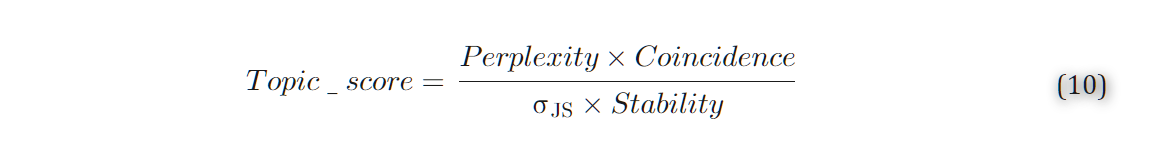

In [13]:
from gensim.models import LdaModel, CoherenceModel

topic_range = [30]

coherence_scores = []
lda_models = []

gensim_dictionary[0] #required to initalize

print("FITTING LDA MODELS")

for num_topics in topic_range:
    print(f"\nFitting model with {num_topics} topics...")
    
    #Fit the  lda  model
    lda_model = LdaModel(
        corpus=corpus,
        id2word=gensim_dictionary,
        num_topics=num_topics,
        random_state=1  
    )
    lda_models.append(lda_model)
    
    #Coherence calculation
    coherence_model = CoherenceModel(
        model=lda_model, texts=df_with_lyrics['lyric_tokens'], dictionary=gensim_dictionary, coherence='c_v',
        processes=1  #avoids weird addition error
    )
    coherence = coherence_model.get_coherence()
    coherence_scores.append(coherence)
    
    print(f"Coherence score for {num_topics} topics: {coherence:.4f}")

# Show best model
print("MODEL COMPARISON")
print("="*60)

for num_topics, score in zip(topic_range, coherence_scores):
    marker = " ← BEST" if score == max(coherence_scores) else ""
    print(f"{num_topics:2d} topics: {score:.4f}{marker}")

best_idx = coherence_scores.index(max(coherence_scores))
best_num_topics = topic_range[best_idx]

print(f" Best model: {best_num_topics} topics (coherence: {coherence_scores[best_idx]:.4f})")


FITTING LDA MODELS

Fitting model with 30 topics...
Coherence score for 30 topics: 0.3758
MODEL COMPARISON
30 topics: 0.3758 ← BEST
 Best model: 30 topics (coherence: 0.3758)


In [14]:
#30 takes way too long to run
#WE WILL CHOOSE 10!!!!!!
#final_model = lda_models[best_idx]



final_model = lda_models[0]  # 
best_num_topics = 30

# Create topic dataframe (
list_of_topic_tables = []


for topic in final_model.show_topics(num_topics=-1, num_words=10, formatted=False):
    list_of_topic_tables.append(
        pd.DataFrame(
            data=topic[1],
            columns=["Word_" + str(topic[0]), "Prob_" + str(topic[0])],
        )
    )

pd.set_option('display.max_columns', 500)
bigdf = pd.concat(list_of_topic_tables, axis=1)

print("\n=== TOPICS (Top 10 words for each) ===")
print(bigdf)

# Save it
bigdf.to_csv('lda_topics.csv', index=False)
print("\n Saved: lda_topics.csv")


=== TOPICS (Top 10 words for each) ===
   Word_0    Prob_0   Word_1    Prob_1      Word_2    Prob_2   Word_3  \
0  heaven  0.059396     live  0.059040        give  0.197973      see   
1    high  0.052393     much  0.050696        call  0.072988    light   
2       u  0.031806     mama  0.045220        name  0.042160     free   
3    fire  0.031691     lady  0.044578       stand  0.036793  without   
4     fly  0.031059     wish  0.043038     forever  0.032136     face   
5     sky  0.024693   living  0.026272    anything  0.022353      eye   
6   child  0.022128      god  0.023868    together  0.022256      set   
7  higher  0.019801     life  0.019043  everything  0.020317      bye   
8     sun  0.017828  missing  0.018671      chance  0.019609   inside   
9   daddy  0.015030  promise  0.017365      number  0.018518     fall   

     Prob_3     Word_4    Prob_4   Word_5    Prob_5  Word_6    Prob_6  Word_7  \
0  0.133311        day  0.284014  tonight  0.153218    away  0.078540   nig

In [15]:
# Create topic probabilities for each document (exactly like article)
topic_probs = []

print(" topic probabilities for each song calculation")
for document in corpus:
    document_topics = []
    for topic_prob in final_model.get_document_topics(document, minimum_probability=0):
        document_topics.append(topic_prob[1])
    topic_probs.append(document_topics)

# Create dataframe
topic_probs_df = pd.DataFrame(topic_probs)

# Merge with original data (article's approach)
doc_topics = df_with_lyrics.reset_index().merge(
    topic_probs_df,
    left_index=True,
    right_index=True
)

# Add dominant topic column
doc_topics['dominant_topic'] = topic_probs_df.idxmax(axis=1)

print(f"Added {best_num_topics} topic probability columns")
print("SAMPLE WITH TOPIC")
print(doc_topics[['Song', 'Performer', 'dominant_topic']].head(10))

# Save
doc_topics.to_csv('songs_with_topic_probabilities.csv', index=False)
print("\n Saved: songs_with_topic_probabilities.csv")

 topic probabilities for each song calculation
Added 30 topic probability columns
SAMPLE WITH TOPIC
                     Song                 Performer  dominant_topic
0  Don't Just Stand There                Patty Duke              29
1  Don't Just Stand There                Patty Duke              29
2  Don't Just Stand There                Patty Duke              29
3  Don't Just Stand There                Patty Duke              29
4  Don't Just Stand There                Patty Duke              29
5  Don't Just Stand There                Patty Duke              29
6  Don't Just Stand There                Patty Duke              29
7  Don't Just Stand There                Patty Duke              29
8     Don't Knock My Love  Diana Ross & Marvin Gaye               8
9     Don't Knock My Love  Diana Ross & Marvin Gaye               8

 Saved: songs_with_topic_probabilities.csv



=== WEEKLY TOPIC DISTRIBUTIONS ===
Total weeks: 3279
   week_date         0         1         2         3         4         5  \
0 1958-08-02  0.039220  0.024307  0.018744  0.020935  0.017411  0.007067   
1 1958-08-09  0.034654  0.028468  0.019530  0.022418  0.014339  0.006295   
2 1958-08-16  0.052874  0.032908  0.012237  0.023124  0.018696  0.008945   
3 1958-08-23  0.057305  0.024088  0.012831  0.027793  0.016761  0.010612   
4 1958-08-30  0.054583  0.029252  0.013039  0.024782  0.017708  0.011379   

          6         7         8         9        10        11        12  \
0  0.070043  0.019251  0.031359  0.018740  0.021488  0.039057  0.018606   
1  0.066495  0.020799  0.017206  0.021681  0.022650  0.039736  0.018181   
2  0.068709  0.024853  0.017614  0.015250  0.020027  0.043109  0.019040   
3  0.076783  0.025543  0.016131  0.015036  0.020156  0.041286  0.017075   
4  0.066381  0.022528  0.021194  0.011835  0.018583  0.040768  0.018601   

         13        14        15       

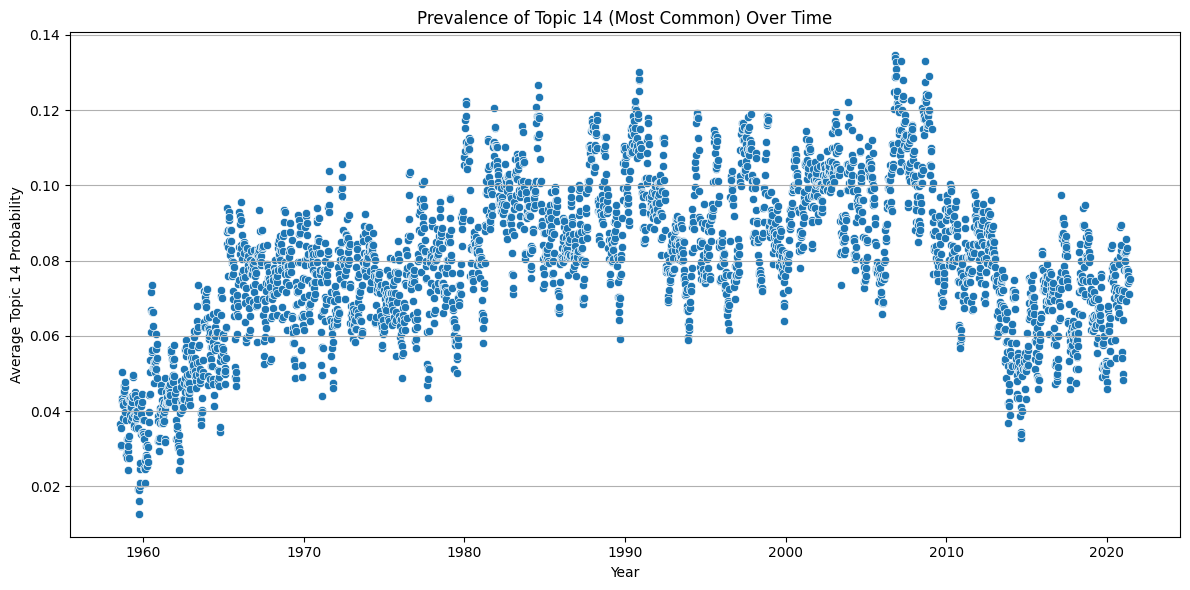

 top_topic_over_time.png


In [16]:
# Convert date
doc_topics['week_date'] = pd.to_datetime(doc_topics['WeekID'])
doc_topics['year'] = doc_topics['week_date'].dt.year
topic_cols = [col for col in doc_topics.columns if isinstance(col, int)]

# Get average topic probabilities by week
weekly_topics = doc_topics.groupby('week_date')[topic_cols].mean().reset_index()

print(f"\n=== WEEKLY TOPIC DISTRIBUTIONS ===")
print(f"Total weeks: {len(weekly_topics)}")
print(weekly_topics.head())

# Save
weekly_topics.to_csv('weekly_topic_distributions.csv', index=False)
print("\n Saved: weekly_topic_distributions.csv")
# Sum the topic probabilities across all weeks to find the dominant topic
topic_sums = weekly_topics[topic_cols].sum()

# Get the topic with the highest total probability
top_topic = topic_sums.idxmax()
print(f"Top topic is: {top_topic}")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=weekly_topics, x='week_date', y=top_topic)
plt.title(f'Prevalence of Topic {top_topic} (Most Common) Over Time')
plt.xlabel('Year')
plt.ylabel(f'Average Topic {top_topic} Probability')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('top_topic_over_time.png')
plt.show()

print(f" top_topic_over_time.png")



<>:29: SyntaxWarning: invalid escape sequence '\L'
<>:29: SyntaxWarning: invalid escape sequence '\L'
C:\Users\joshu\AppData\Local\Temp\ipykernel_44424\1795442542.py:29: SyntaxWarning: invalid escape sequence '\L'
  print(f"\Loaded {len(df)} months")


\Loaded 569 months
 30 topics
DOMINANT TOPICS: RECESSION vs NORMAL

Analyzing 569 months:
  Recession: 73 months (12.8%)
  Normal: 496 months (87.2%)

🔴 TOP 10 TOPICS THAT INCREASE DURING RECESSIONS:
Topic    Label                                Recession     Normal     Change
-------------------------------------------------------------------------------------
14       Time, Thinking, & Change                76.71%     55.44%    +21.27% ⬆️⬆️
20       True Love                               13.70%     12.50%     +1.20% ↗️
6        Heartbreak                               2.74%      2.82%     -0.08% →
18       Past/Memory                              0.00%      0.40%     -0.40% →
23       Hip-Hop/Urban                            2.74%      6.85%     -4.12% →
21       Flexing                                  4.11%     21.98%    -17.87% →

🔵 TOP 10 TOPICS THAT DECREASE DURING RECESSIONS:
Topic    Label                                Recession     Normal     Change
------------------------

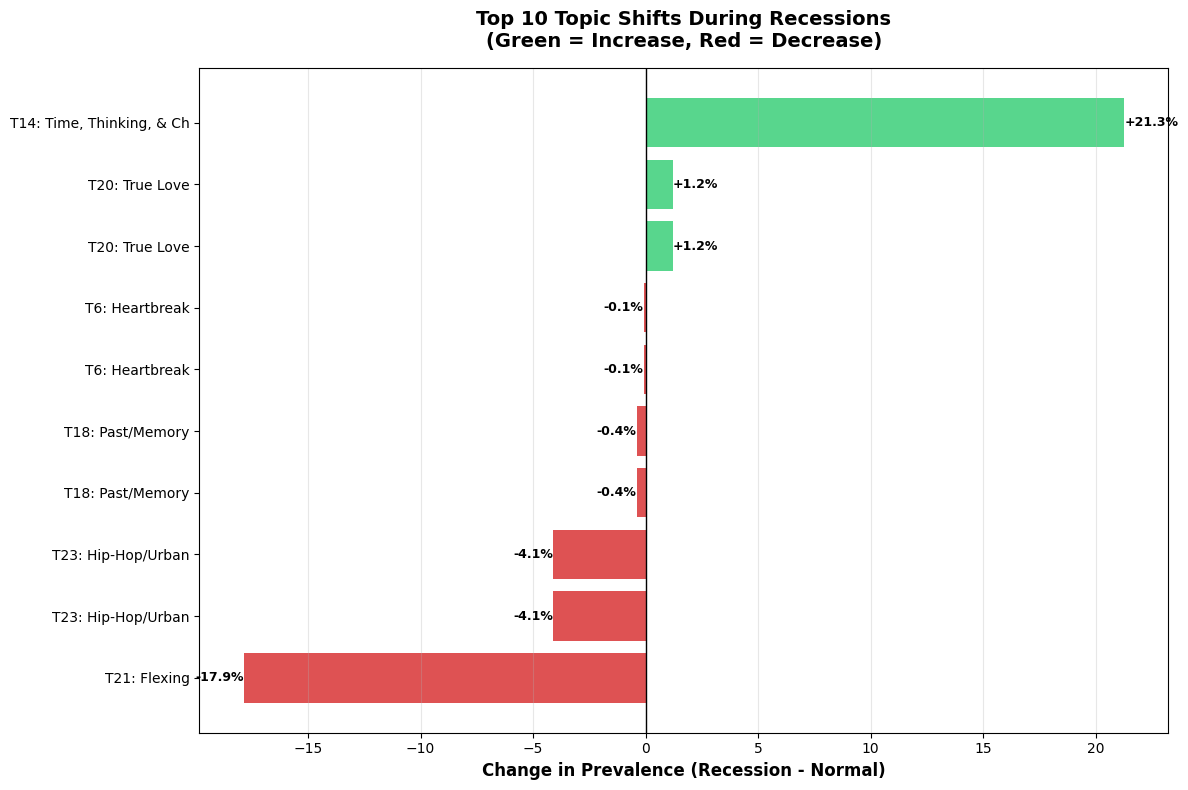

Saved: topic_shifts_recession.png


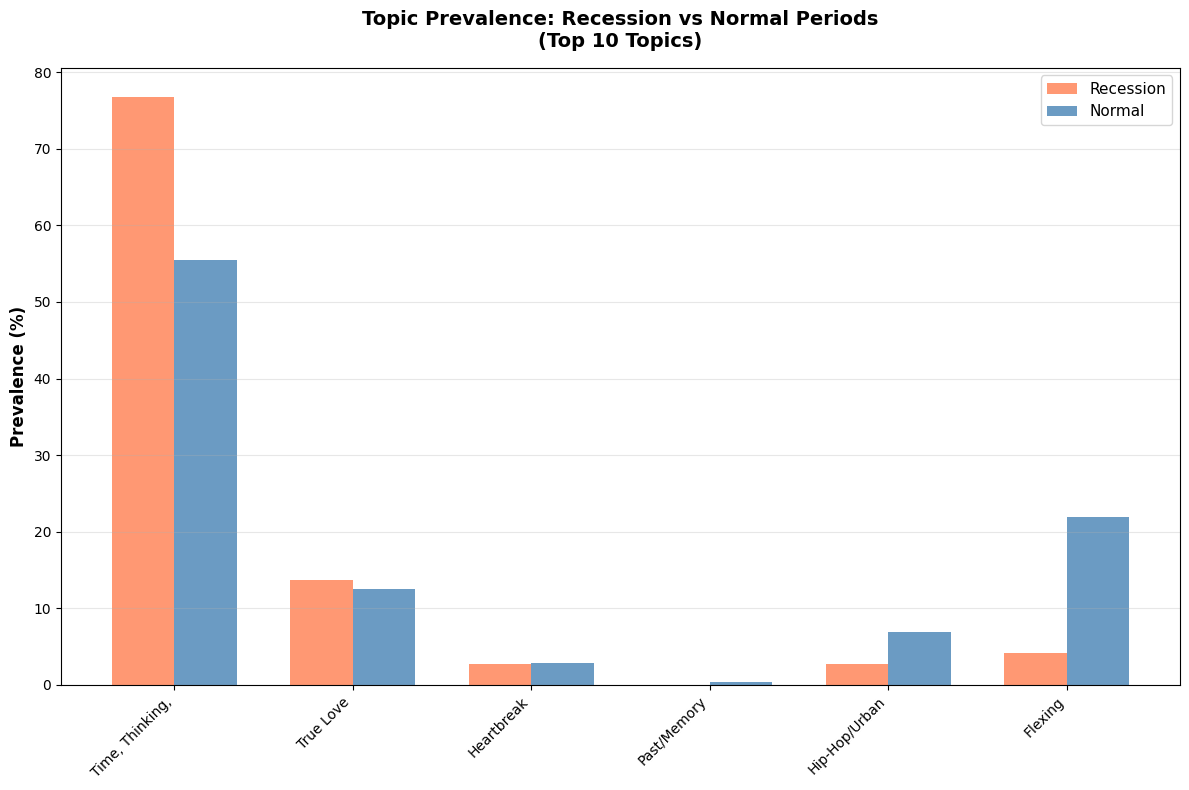

 Saved: topic_comparison_bars.png


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Load data
df = pd.read_csv(r'C:\Users\joshu\OneDrive\Desktop\CS74\Final_Project\music_econ_topics_merged.csv')
VISUALS_DIR = r'C:\Users\joshu\OneDrive\Desktop\CS74\Final_Project\visuals'

# Topic columns (0-29)
topic_cols = [str(i) for i in range(30)]

# Your actual topic labels
topic_labels = {
    '0': "Spiritual", '1': "Relationship", '2': "Longing",
    '3': "Clarity", '4': "Everyday Joyousness", '5': "Dance, Tonight's a Movie",
    '6': "Heartbreak", '7': "Intimacy", '8': "Self/Body",
    '9': "Party/Club", '10': "Bop/Dance Vibes", '11': "Social Talk",
    '12': "Girl & Fun", '13': "Music & Friends", '14': "Time, Thinking, & Change",
    '15': "Appreciation", '16': "Admiring", '17': "Regret/Reflection",
    '18': "Past/Memory", '19': "Hopes & Dreams", '20': "True Love",
    '21': "Flexing", '22': "Romantic/Intimate", '23': "Hip-Hop/Urban",
    '24': "Home", '25': "Dance & Music", '26': "Playfulness",
    '27': "Feeling Good", '28': "Freaky-Deaky", '29': "Romantic Yearning"
}

print(f"\Loaded {len(df)} months")
print(f" {len(topic_cols)} topics")


print("DOMINANT TOPICS: RECESSION vs NORMAL")

df_topics = df[topic_cols + ['USREC', 'week_date']].dropna()

print(f"\nAnalyzing {len(df_topics)} months:")
print(f"  Recession: {(df_topics['USREC']==1).sum()} months ({(df_topics['USREC']==1).sum()/len(df_topics)*100:.1f}%)")
print(f"  Normal: {(df_topics['USREC']==0).sum()} months ({(df_topics['USREC']==0).sum()/len(df_topics)*100:.1f}%)")

# Get dominant topic for each month
df_topics['dominant_topic'] = df_topics[topic_cols].astype(float).idxmax(axis=1)
df_topics['dominant_prob'] = df_topics[topic_cols].astype(float).max(axis=1)

recession_topics = df_topics[df_topics['USREC'] == 1]['dominant_topic'].value_counts(normalize=True) * 100
normal_topics = df_topics[df_topics['USREC'] == 0]['dominant_topic'].value_counts(normalize=True) * 100

topic_comparison = pd.DataFrame({
    'Recession': recession_topics,
    'Normal': normal_topics
}).fillna(0)
topic_comparison['Difference'] = topic_comparison['Recession'] - topic_comparison['Normal']
topic_comparison_sorted = topic_comparison.sort_values('Difference', ascending=False)


print("\n🔴 TOP 10 TOPICS THAT INCREASE DURING RECESSIONS:")
print(f"{'Topic':<8} {'Label':<35} {'Recession':>10} {'Normal':>10} {'Change':>10}")
print("-" * 85)


#AI - Gemini Use to help with visuals, sorting , and 
for topic, row in topic_comparison_sorted.head(10).iterrows():
    label = topic_labels.get(topic, f"Topic {topic}")[:33]  # Use string key, truncate
    rec = row['Recession']
    norm = row['Normal']
    diff = row['Difference']
    
    # Visual indicator
    if diff > 10:
        arrow = "⬆️⬆️"
    elif diff > 5:
        arrow = "⬆️"
    elif diff > 1:
        arrow = "↗️"
    else:
        arrow = "→"
    
    print(f"{topic:<8} {label:<35} {rec:>9.2f}% {norm:>9.2f}% {diff:>+9.2f}% {arrow}")


print("\n🔵 TOP 10 TOPICS THAT DECREASE DURING RECESSIONS:")
print(f"{'Topic':<8} {'Label':<35} {'Recession':>10} {'Normal':>10} {'Change':>10}")
print("-" * 85)

for topic, row in topic_comparison_sorted.tail(10).iterrows():
    label = topic_labels.get(topic, f"Topic {topic}")[:33]
    rec = row['Recession']
    norm = row['Normal']
    diff = row['Difference']
    
    # Visual indicator
    if diff < -10:
        arrow = "⬇️⬇️"
    elif diff < -5:
        arrow = "⬇️"
    elif diff < -1:
        arrow = "↘️"
    else:
        arrow = "→"
    
    print(f"{topic:<8} {label:<35} {rec:>9.2f}% {norm:>9.2f}% {diff:>+9.2f}% {arrow}")


print("\n" + "="*70)
print("STATISTICAL SIGNIFICANCE")
print("="*70)

contingency = pd.crosstab(df_topics['USREC'], df_topics['dominant_topic'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

print(f"\nChi-square test: χ²={chi2:.2f}, p={p_value:.6f}, df={dof}")

if p_value < 0.001:
    print("✅ HIGHLY SIGNIFICANT (p < 0.001)")
    print("   Topic distribution differs DRAMATICALLY during recessions")
elif p_value < 0.05:
    print("✅ SIGNIFICANT (p < 0.05)")
    print("   Topic distribution differs during recessions")
else:
    print("⚠️  Not significant (p >= 0.05)")

# Effect size
n = len(df_topics)
cramers_v = np.sqrt(chi2 / (n * (min(len(contingency.index)-1, len(contingency.columns)-1))))
print(f"\nEffect size (Cramér's V): {cramers_v:.3f}")
if cramers_v > 0.3:
    print("   → Strong effect")
elif cramers_v > 0.1:
    print("   → Moderate effect")
else:
    print("   → Weak effect")

# ==================== KEY FINDINGS ====================

print("\n" + "="*70)
print("🔑 KEY FINDINGS")
print("="*70)

# Biggest shifts
max_increase_topic = topic_comparison_sorted.index[0]
max_increase_label = topic_labels.get(max_increase_topic, f"Topic {max_increase_topic}")
max_increase = topic_comparison_sorted.iloc[0]

max_decrease_topic = topic_comparison_sorted.index[-1]
max_decrease_label = topic_labels.get(max_decrease_topic, f"Topic {max_decrease_topic}")
max_decrease = topic_comparison_sorted.iloc[-1]

print(f"\n🔴 BIGGEST INCREASE:")
print(f"   Topic {max_increase_topic}: '{max_increase_label}'")
print(f"   {max_increase['Normal']:.1f}% (normal) → {max_increase['Recession']:.1f}% (recession)")
print(f"   Change: +{max_increase['Difference']:.1f} percentage points")
print(f"   This is a {(max_increase['Recession']/max_increase['Normal']-1)*100:+.0f}% relative increase!")

print(f"\n🔵 BIGGEST DECREASE:")
print(f"   Topic {max_decrease_topic}: '{max_decrease_label}'")
print(f"   {max_decrease['Normal']:.1f}% (normal) → {max_decrease['Recession']:.1f}% (recession)")
print(f"   Change: {max_decrease['Difference']:.1f} percentage points")
print(f"   This is a {(max_decrease['Recession']/max_decrease['Normal']-1)*100:.0f}% relative decrease!")


print("\n" + "="*70)
print("CREATING VISUALIZATIONS")
print("="*70)

# Visualization 1: Topic shifts bar chart
fig, ax = plt.subplots(figsize=(12, 8))

top_movers = pd.concat([
    topic_comparison_sorted.head(5),
    topic_comparison_sorted.tail(5)
])

top_movers = top_movers.sort_values('Difference')

labels = [f"T{t}: {topic_labels.get(t, t)[:20]}" for t in top_movers.index]

colors = ['#d62728' if d < 0 else '#2ecc71' for d in top_movers['Difference']]
bars = ax.barh(range(len(top_movers)), top_movers['Difference'], color=colors, alpha=0.8)
ax.set_yticks(range(len(top_movers)))
ax.set_yticklabels(labels, fontsize=10)
ax.set_xlabel('Change in Prevalence (Recession - Normal)', fontweight='bold', fontsize=12)
ax.set_title('Top 10 Topic Shifts During Recessions\n(Green = Increase, Red = Decrease)', 
             fontweight='bold', fontsize=14, pad=15)
ax.axvline(x=0, color='black', linewidth=1, linestyle='-')
ax.grid(True, alpha=0.3, axis='x')

for i, (idx, row) in enumerate(top_movers.iterrows()):
    value = row['Difference']
    ax.text(value, i, f'{value:+.1f}%', 
           va='center', ha='left' if value > 0 else 'right',
           fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig(f'{VISUALS_DIR}/topic_shifts_recession.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: topic_shifts_recession.png")

# Visualization 2: Comparison bars
fig, ax = plt.subplots(figsize=(12, 8))

# Top 10 topics overall
top_10_overall = topic_comparison_sorted.head(10)

x = np.arange(len(top_10_overall))
width = 0.35

bars1 = ax.bar(x - width/2, top_10_overall['Recession'], width, 
              label='Recession', color='coral', alpha=0.8)
bars2 = ax.bar(x + width/2, top_10_overall['Normal'], width, 
              label='Normal', color='steelblue', alpha=0.8)

# Labels
topic_names = [topic_labels.get(t, f"T{t}")[:15] for t in top_10_overall.index]
ax.set_xticks(x)
ax.set_xticklabels(topic_names, rotation=45, ha='right', fontsize=10)
ax.set_ylabel('Prevalence (%)', fontweight='bold', fontsize=12)
ax.set_title('Topic Prevalence: Recession vs Normal Periods\n(Top 10 Topics)', 
            fontweight='bold', fontsize=14, pad=15)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(f'{VISUALS_DIR}/topic_comparison_bars.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Saved: topic_comparison_bars.png")



In [18]:
pip install TextBlob


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
